In [2]:
# 最简单的模型，只用一个节点

import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # 不使用GPU

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.utils import to_categorical
from keras.layers.core import Dropout

import time
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
# import icecream.ic as ic

Using TensorFlow backend.


读入数据

In [3]:
start = time.time()


train = pd.read_csv('train.csv')
X_train = train.iloc[:, 0:2].values
Y_train = train.iloc[:, 2].values

test = pd.read_csv('test.csv')
X_test = test.iloc[:, 0:2].values
Y_test = test.iloc[:, 2].values

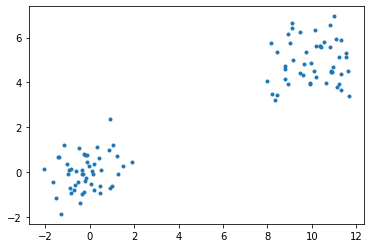

In [6]:
fig = plt.figure(1)
plt.plot(X_train[:, 0], X_train[:, 1], '.')

In [18]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
# K.set_session(sess)
tf.compat.v1.keras.backend.set_session(sess)

file = 'playground1'
if os.path.exists(file+'.h5'):
    model = load_model(file+'.h5')
    # os.rename(file+)
else:
    model = Sequential()
    model.add(Dense(input_dim=2, units=1, activation='sigmoid'))
    # model.add(Dense(1, activation='relu'))
    # model.add(Dense(2, activation='softmax'))
    # model.add(Dropout(0.2))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

In [42]:
# model.fit(X_train, Y_train, batch_size=n, epochs=1000, verbose=1, validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, batch_size=len(Y_train), epochs=300, verbose=0)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)
print('loss:%.4f accuracy:%.4f' % (loss, accuracy))

Weights= [[0.84592456]
 [0.1009808 ]] 
biases= [-2.7903497]
100/100 [==============================] - 0s 50us/step
loss:0.0468 accuracy:0.9900


In [ ]:
w1 = W[0][0]
w2 = W[1][0]
x = np.linspace(0, 5, 101)
y = (-b - w1*x) / w2

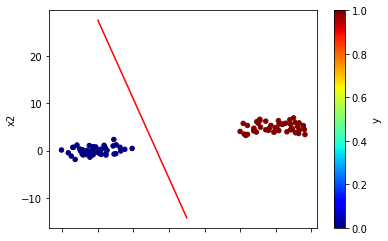

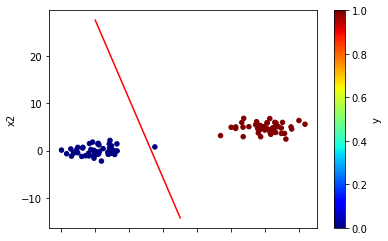

In [51]:
train.plot.scatter('x1', 'x2', c='y', colormap='jet')
plt.plot(x, y, 'r')
# plt.plot(X_train[:, 0], X_train[:, 1], 'b.')
# plt.plot(X_test[:, 0], X_test[:, 1], 'g.')
test.plot.scatter('x1', 'x2', c='y', colormap='jet')
plt.plot(x, y, 'r')
plt.show()

In [44]:
model.save(file+'.h5', overwrite=True)  # 保存模型
model.save(file+'_'+time.strftime("%Y%m%d-%H%M%S", time.localtime())+'.h5')  # 再保存一遍，加上时间